1. Introduction:
This case study focuses on implementing logistic regression to assign lead scores for X Education, aiding in the identification of 'Hot Leads' with a targeted approach to achieve the company's goal of an 80% lead conversion rate.

**Problem Statement:**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals of the Case Study:**
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so these will be needed to handle as well. These problems are provided in a separate doc file.

#Logistic Regression Case Study: Create a logistic regression model to analyse the lead score.

# 1**. Import Libraries, Suppress Warnings and Set Display**

In [1471]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
#statmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')


In [1472]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# **2. Reading the Data**

In [1473]:
#Step 1: Importing data
df_leads=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
df_leads.head()

Prospect ID  Lead Number              Lead Origin     Lead Source  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google   

  Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0           No          No          0          0.0                            0   
1           No          No          0          5.0                          674   
2           No          No          1          2.0                         1532   
3           No          No          0          1.0                          305   
4           No          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country           Specialization  \
0                   0.0  Page Visited on Website     NaN                   Select   
1                   2.5             Email Opened   India                   Select   
2                   2.0             Email Opened   India  Business Administration   
3                   1.0              Unreachable   India    Media and Advertising   
4                   1.0        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine Newspaper Article  \
0                       Better Career Prospects     No       No                No   
1                       Better Career Prospects     No       No                No   
2                       Better Career Prospects     No       No                No   
3                       Better Career Prospects     No       No                No   
4                       Better Career Prospects     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses                                 Tags      Lead Quality  \
0                                     No          Interested in other courses  Low in Relevance   
1                                     No                              Ringing               NaN   
2                                     No  Will revert after reading the email          Might be   
3                                     No                              Ringing          Not Sure   
4                                     No  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City  \
0                                No                        No          Select  Select   
1                                No                        No          Select  Select   
2                                No                        No  Potential Lead  Mumbai   
3                                No                        

In [1474]:
df_leads.shape

(9240, 37)

NOTE: The original dataframe has 9240 rows and 37 columns

# **Step 2: Data Understanding and Inspection**

In [1475]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and
# also spot anything unusual

df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000   
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820   
std     23405.995698     0.486714     4.854853                   548.021466              2.161418   
min    579533.000000     0.000000     0.000000                     0.000000              0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000   
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000   
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000   
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000   

       Asymmetrique Activity Score  Asymmetrique Profile Score  
count                  5022.000000                 5022.000000  
mean                     14.306252                   16.344883  
std                       1.386694                    1.811395  
min                       7.000000                   11.000000  
25%                      14.000000                   15.000000  
50%                      14.000000                   16.000000  
75%                      15.000000                   18.000000  
max                      18.000000                   20.000000

In [1476]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
Receive More Updates About Our Courses              1
Tags                                               26
Lead Quality                                        5
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
Lead Profile                                        6
City                                                7
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
I agree to pay the amount through cheque            1
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [1477]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong><span style="color:blue">NOTE:</span></strong> There are **`null values`** in the dataframe

In [1478]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'What matters most to you in choosing a course',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

NOTE: There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

In [1479]:
#missing data percentage
round(100*(df_leads.isnull().sum()/df_leads.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                             36.29
Lead Quality                                     51.59
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [1480]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

**NOTE: There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step**

# **Step 3: Data Cleaning**

Data Cleaning and Encoding
Looking at the data set we observe that we need to do the following before we proceed further:


*   Encoding categorical variables
*   Missing value handling
*   Convert the 'Select' value into NaN
*   Dropping the columns which have more than 40% missing data

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null(NaN) values.

In [1481]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [1482]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [1483]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


In [1484]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Profile                                     6855
City                                             3669
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

NOTE: Now, there are no 'Select' values in the dataframe df_leads.

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [1485]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
A free copy of Mastering The Interview            0.000000
Prospect ID                                       0.000000
Newspaper Article                                 0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Lead Number                                       0.000000
Magazine                                          0.000000
Search                                            0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

***Drop Columns with more than 40% Null Values***

In [1486]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):

    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Shape after dropping columns: ",data.shape)

In [1487]:
# dropping columns using UDF
dropNullColumns(df_leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [1488]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Digital Advertisement                             0.000000
Search                                            0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.000000
dtype: float64

# Columns with Categorical Data

In [1489]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


NOTE: Approach would be to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [1490]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

# **Insights:**
**City: **City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

**Specialization: **Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

**Tags: **Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

**What matters most to you in choosing a course: **This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

**What is your current occupation: **We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

**Country: **X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

**Last Activity:** "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

**Lead Source:** "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

Dropping the following columns

'City',
'Tags',
'Country',
'What matters most to you in choosing a course'

In [1491]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


Imputing the following columns

'Specialization',
'Lead Source',
'Last Activity',
'What is your current occupation'

In [1492]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [1493]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email                                0.00
Lead Source                                 0.00
Lead Origin                                 0.00
Last Notable Activity                       0.00
dtype: float64

# Columns with Numerical Data

In [1494]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

<strong><span style="color:blue">NOTE:</span></strong> Missing values in 'TotalVisits' can be imputed with `mode`.

In [1495]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [1496]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [1497]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

NOTE: Missing values in 'Page Views Per Visit' can be imputed with mode.

Re-checking the null values for columns

In [1498]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                                 0.0
Do Not Email                                0.0
Lead Source                                 0.0
Lead Origin                                 0.0
Last Notable Activity                       0.0
dtype: float64

Removing Unwanted Columns

Handling columns with only one unique value

In [1499]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

Prospect ID              Lead Origin Lead Source Do Not Email  \
count                                   9240                     9240        9240         9240   
unique                                  9240                        5          21            2   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission      Google           No   
freq                                       1                     4886        2904         8506   

       Do Not Call Last Activity Specialization What is your current occupation Search Magazine  \
count         9240          9240           9240                            9240   9240     9240   
unique           2            17             19                               6      2        1   
top             No  Email Opened         Others                      Unemployed     No       No   
freq          9238          3540           3380                            8290   9226     9240   

       Newspaper Article X Education Forums Newspaper Digital Advertisement  \
count               9240               9240      9240                  9240   
unique                 2                  2         2                     2   
top                   No                 No        No                    No   
freq                9238               9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque A free copy of Mastering The Interview  \
count                                      9240                                   9240   
unique                                        1                                      2   
top                                          No                                     No   
freq                                       9240                                   6352   

       Last Notable Activity  
count                   9240  
unique                    16  
top                 Modified  
freq                    3407

NOTE: Following columns have only one unique value:

'I agree to pay the amount through cheque',
'Get updates on DM Content',
'Update me on Supply Chain Content',
'Receive More Updates About Our Courses',
'Magazine'
These columns are of no use as they have only one category of response from customer and can be dropped:

In [1500]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)


Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


** Dropping columns of no use for modeling**
NOTE: Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [1501]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [1502]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

NOTE: No missing values in rows

Checking & Dropping Category Columns that are Skewed
NOTE: This is similar to the handling of unique values in numeric columns

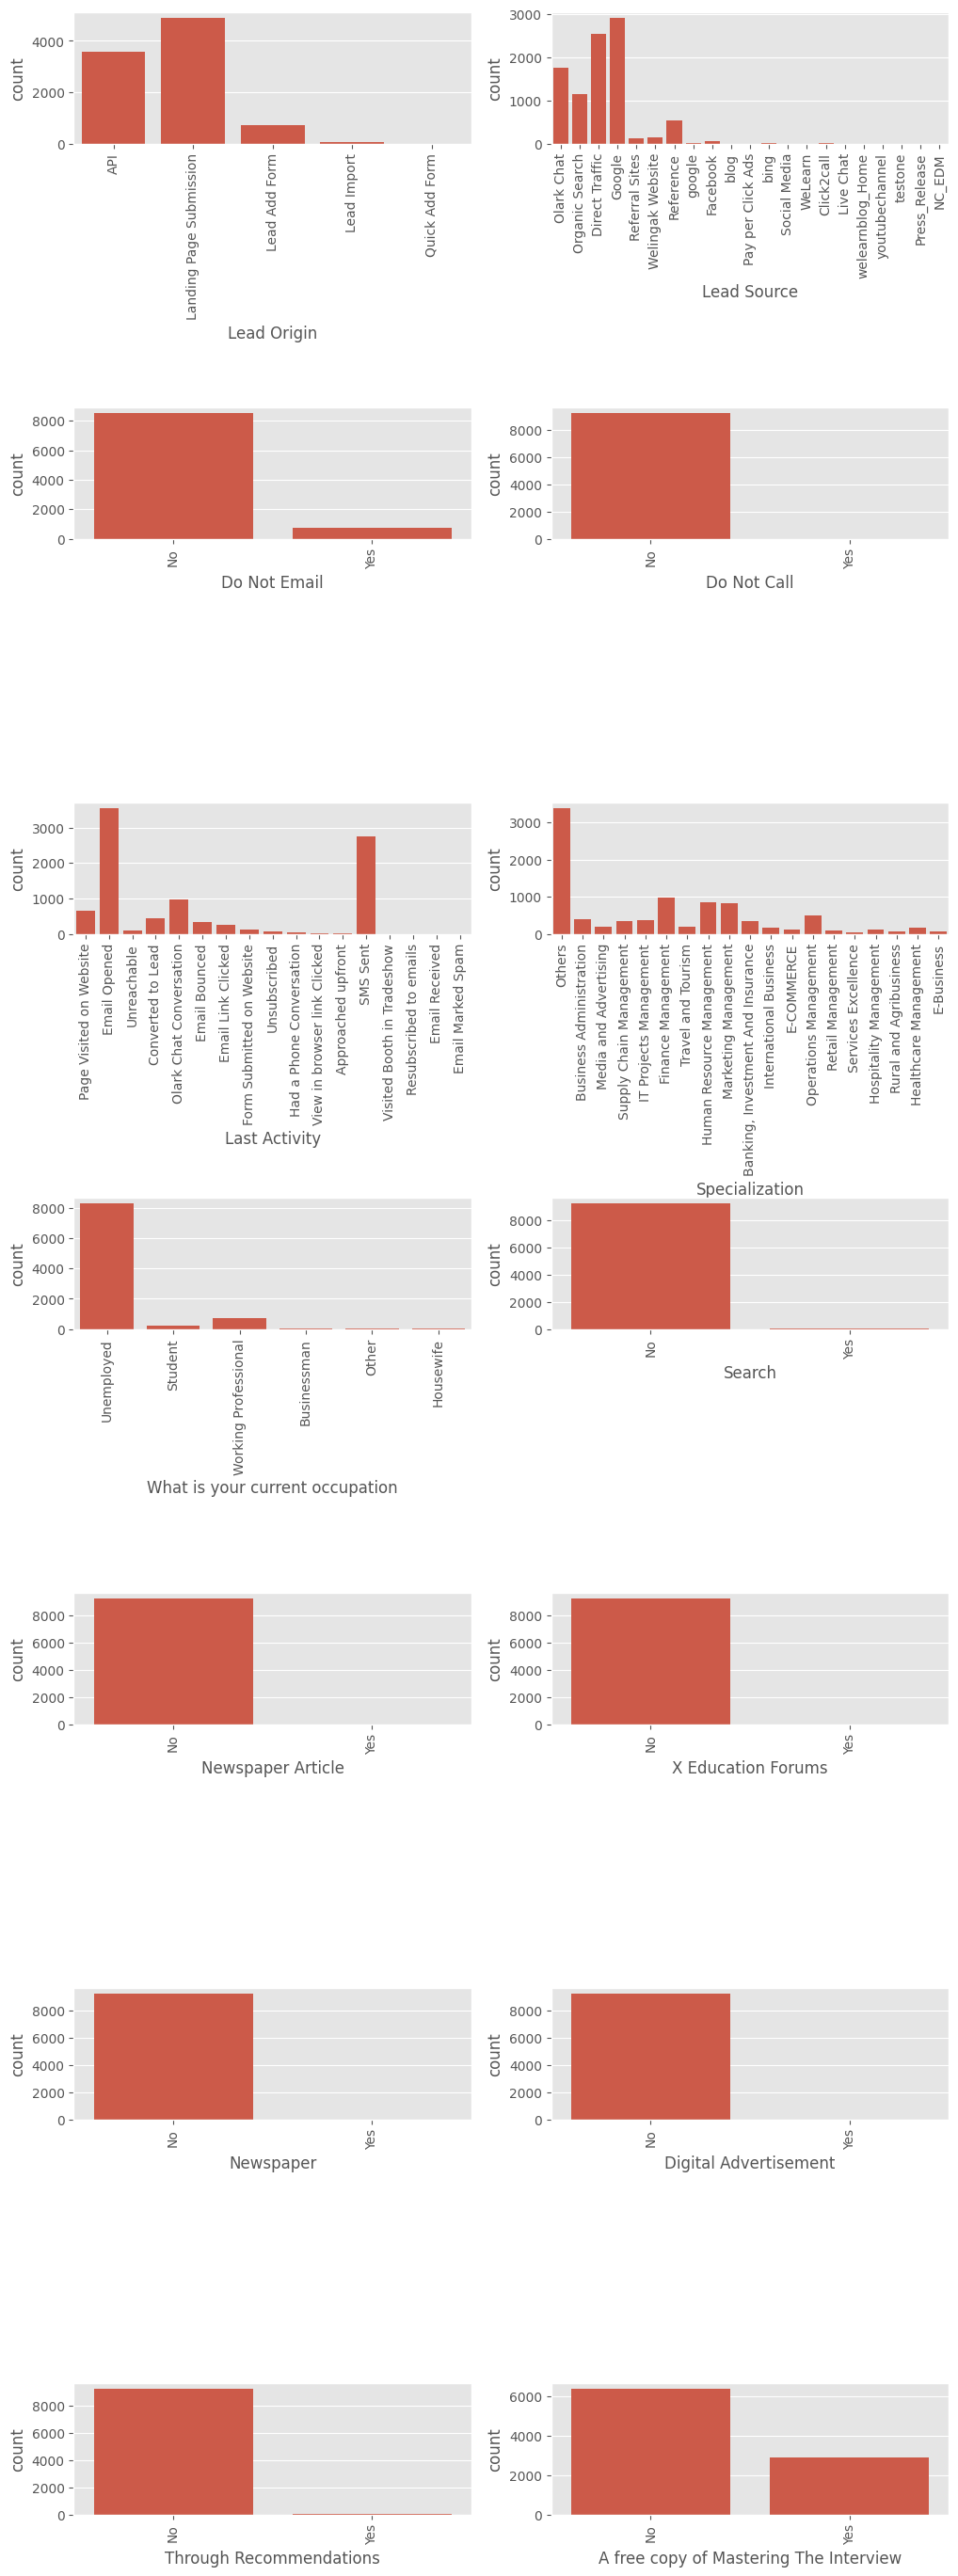

In [1503]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads)
    plt.xticks(rotation=90)



NOTE: Following columns have data which is highly skewed :

'Do Not Call',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations'.
Hence these columns will be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [1504]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [1505]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat           No          0          0.0   
1                      API  Organic Search           No          0          5.0   
2  Landing Page Submission  Direct Traffic           No          1          2.0   
3  Landing Page Submission  Direct Traffic           No          0          1.0   
4  Landing Page Submission          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation A free copy of Mastering The Interview  
0                   Others                      Unemployed                                     No  
1                   Others                      Unemployed                                     No  
2  Business Administration                         Student                                    Yes  
3    Media and Advertising                      Unemployed                                     No  
4                   Others                      Unemployed                                     No

**Outlier Analysis: For Numerical Columns**

In [1506]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

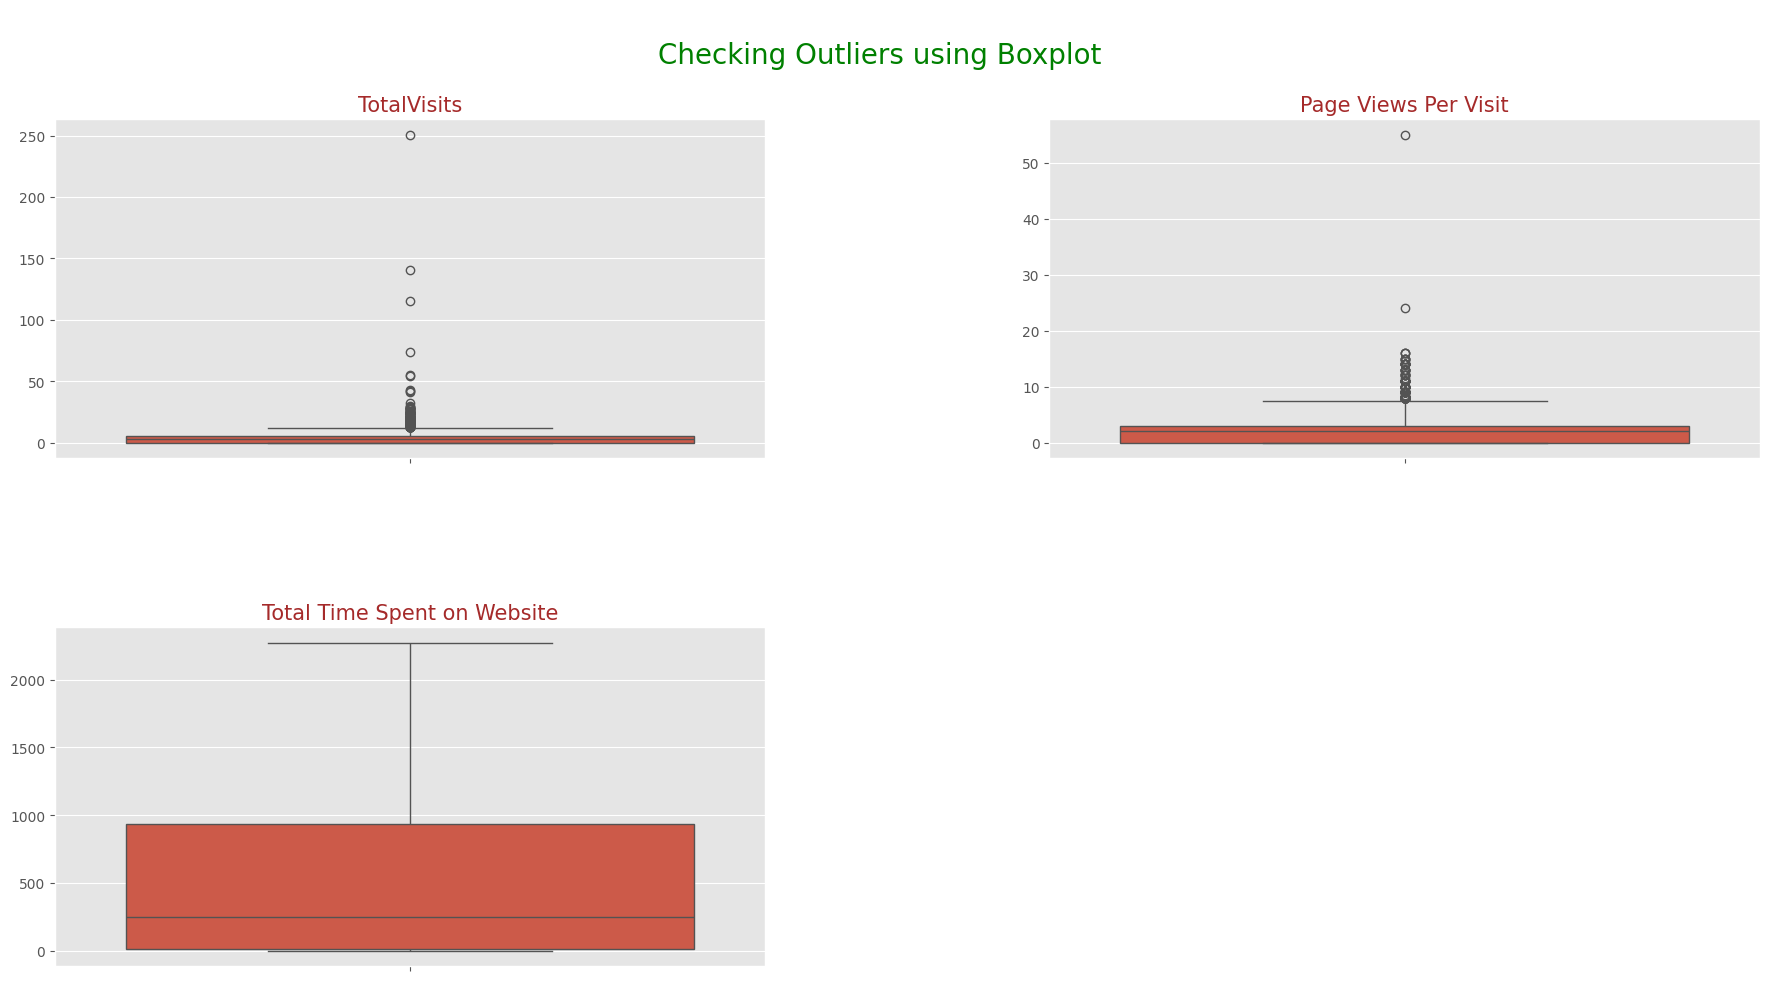

In [1507]:
# Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF
Check_Outliers(df_leads,num_cols)

# **Capping the outliers**

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [1508]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000  9240.000000                  9240.000000           9240.000000
mean      0.385390     3.394156                   487.698268              2.327787
std       0.486714     4.836682                   548.021466              2.164258
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                    12.000000              0.000000
50%       0.000000     3.000000                   248.000000              2.000000
75%       1.000000     5.000000                   936.000000              3.000000
95%       1.000000    10.000000                  1562.000000              6.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [1509]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])



In [1510]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(df_leads,capping_cols)

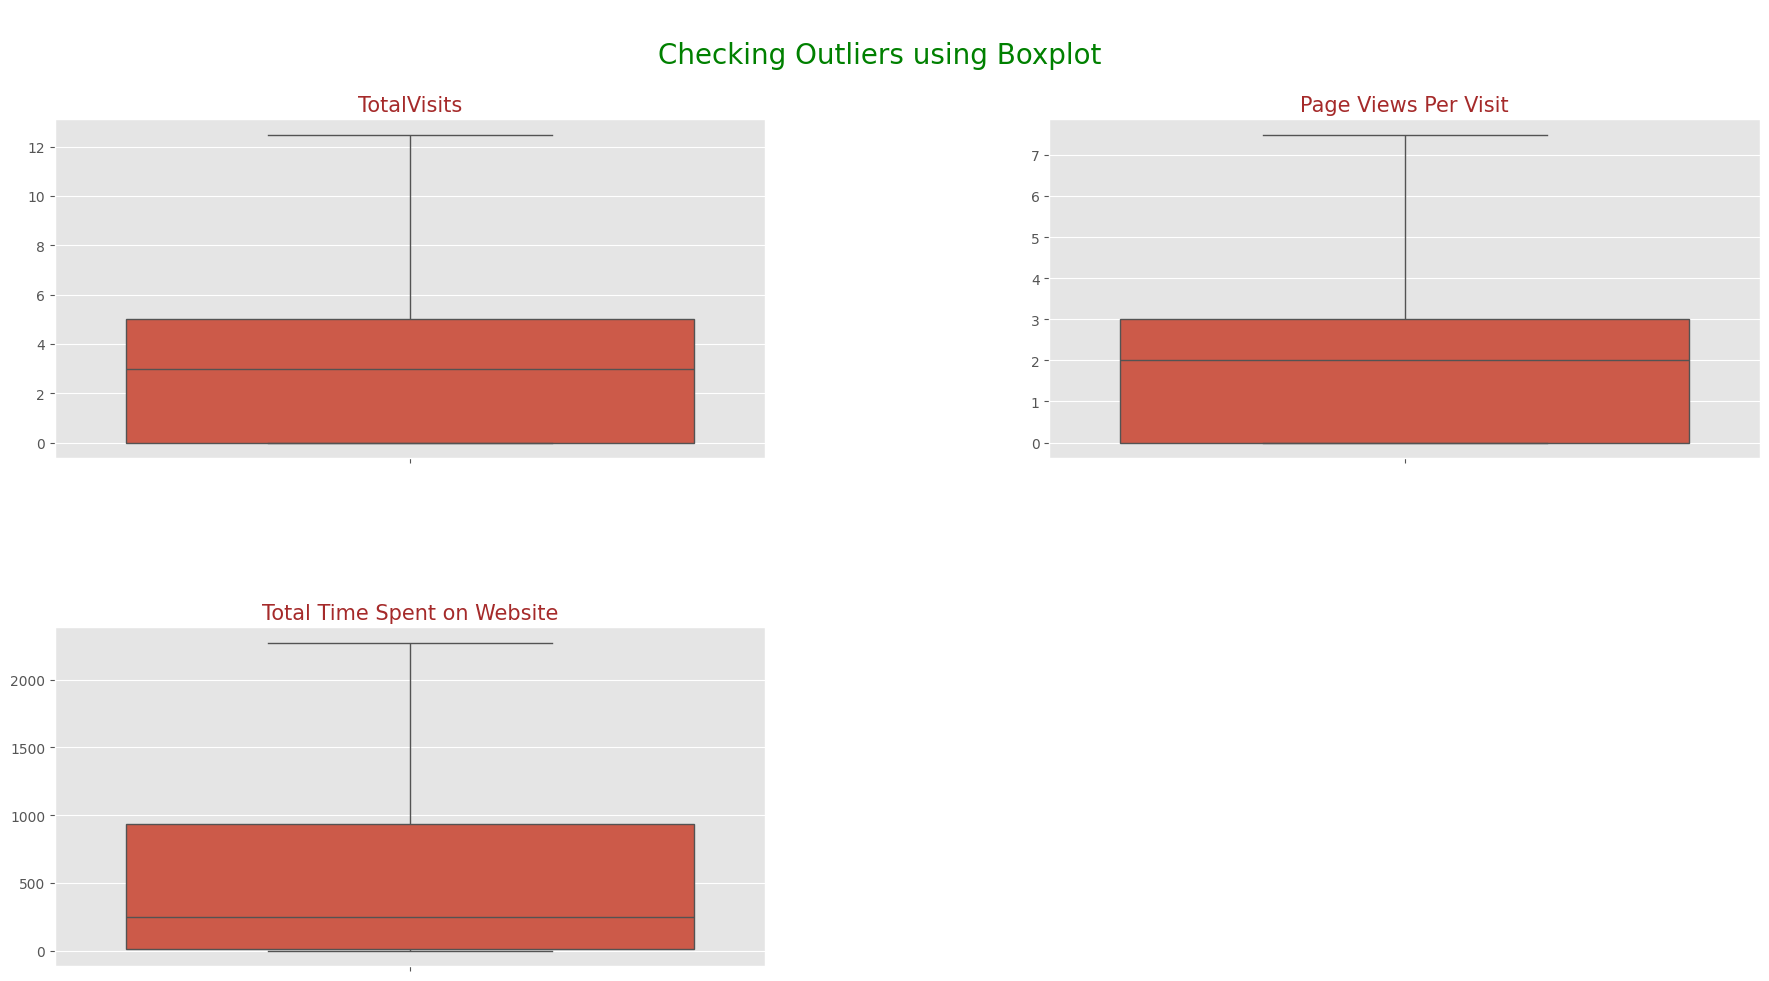

In [1511]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [1512]:
## Categorical Variables

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("__"*40,"\n")


value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

________________________________________________________________________________ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog          

NOTE:

We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case.

In [1513]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [1514]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [1515]:
# Grouping low frequency value levels to Others
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [1516]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [1517]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


<strong><span style="color:blue">NOTE:</span></strong>
- "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

In [1518]:
df_leads.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization',
       'Current_occupation', 'Free_copy'],
      dtype='object')

# **Data Analysis (EDA)**

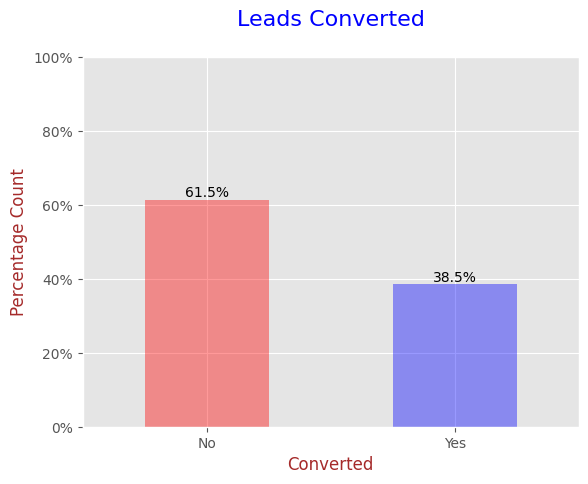

In [1519]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Blue"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Blue'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
While 61.5% of the people didnt convert to leads. (Majority)

In [1520]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

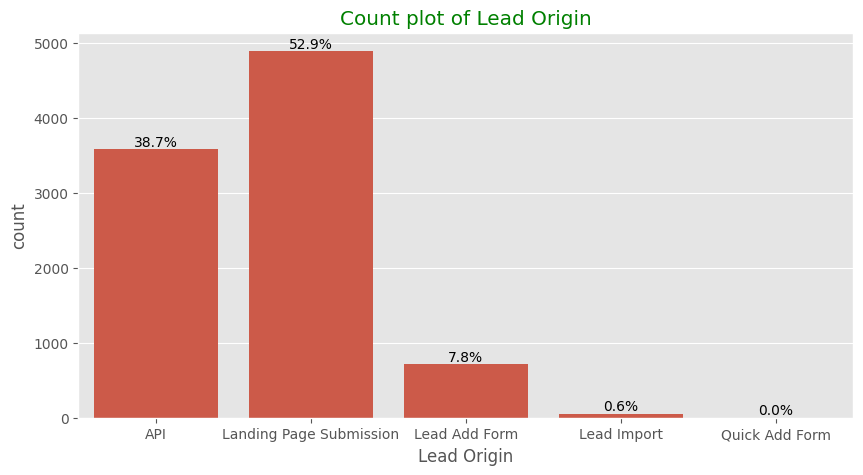

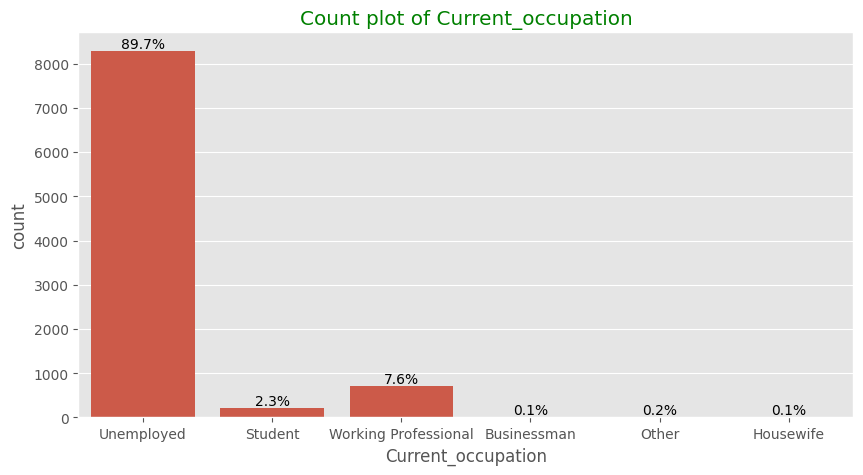

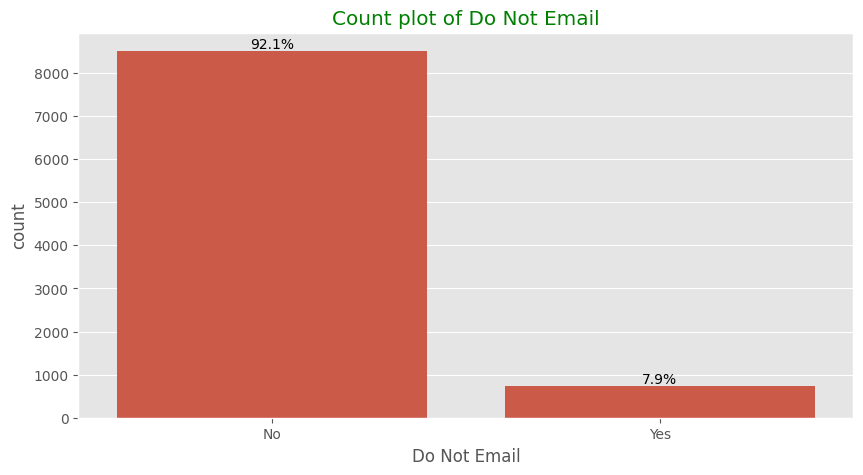

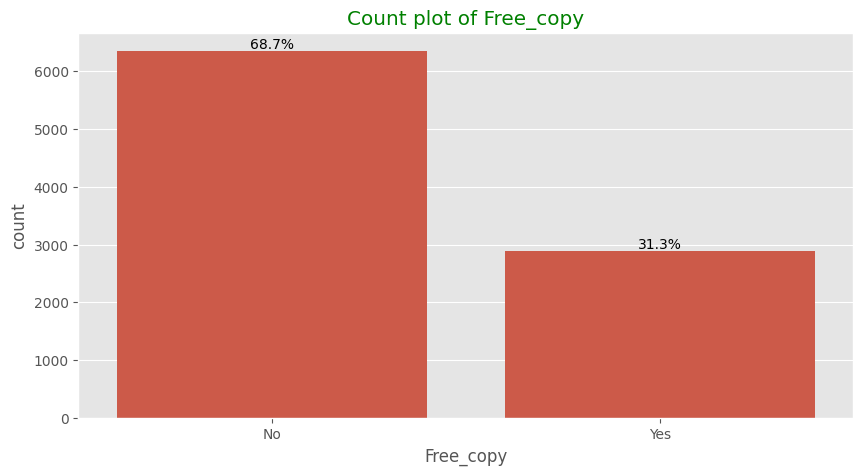

In [1521]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

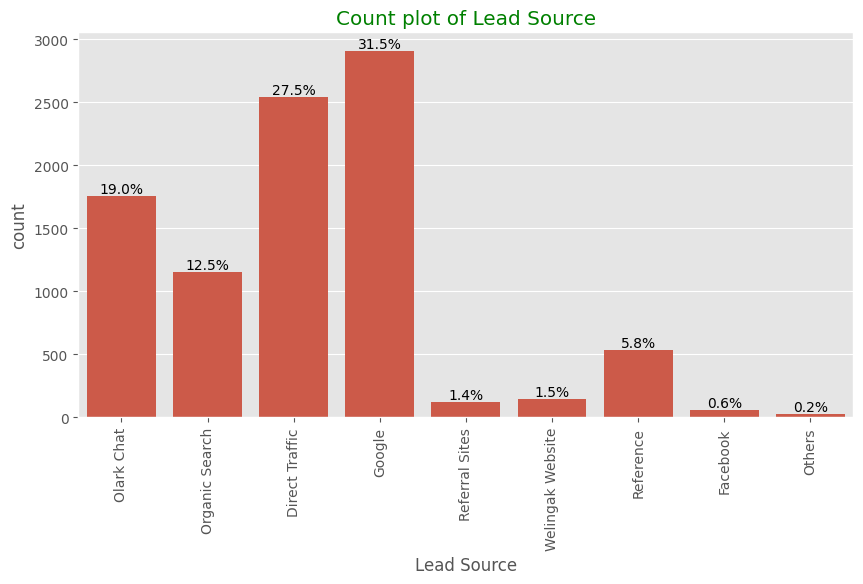

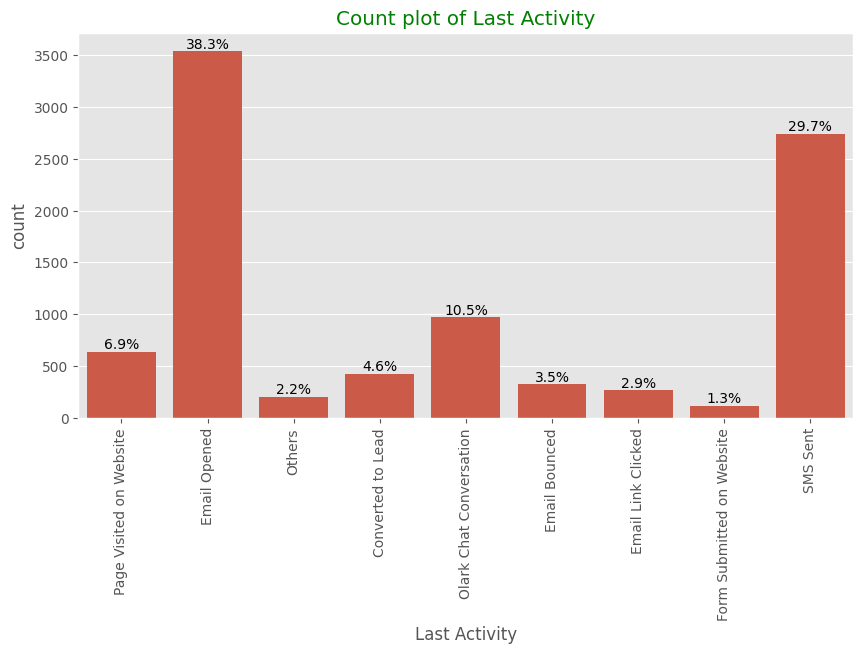

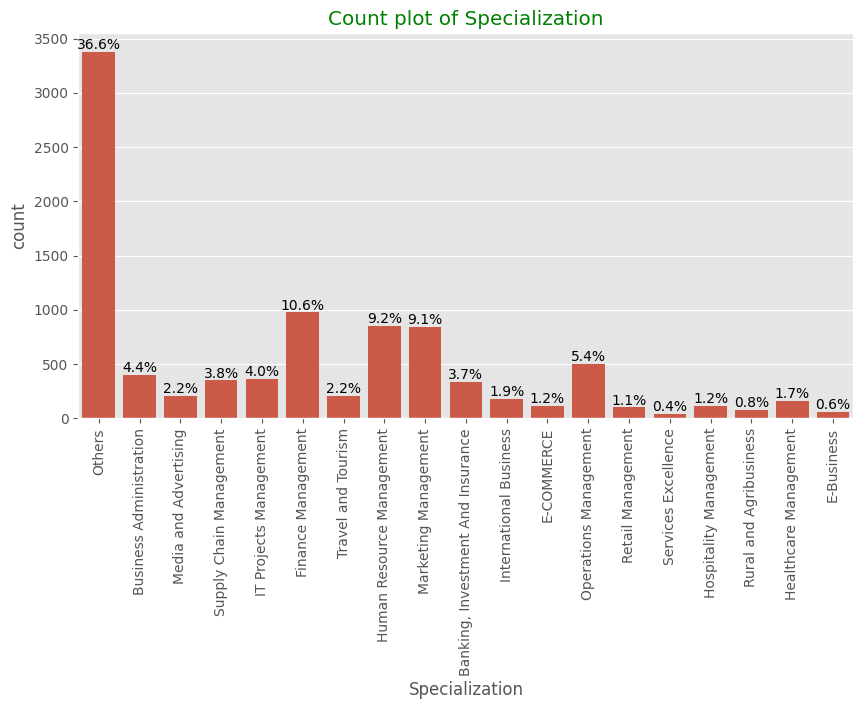

In [1522]:
# Barplot for remaining columns from cat_cols
for i in cat_cols[4:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

Here is the list of features from variables which are present in majority
**Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%.

**What is your current occupation: **It has 90% of the customers as Unemployed

**Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

**Lead Source:** 58% Lead source is from Google & Direct Traffic combined

**Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

Bivariate Analysis
# Bivariate analysis happens between two variables

In [1523]:
# UDF "Bivariate_cat" graph tell the Lead Conversion Rate in percentage

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))

    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)

    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation for the plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')



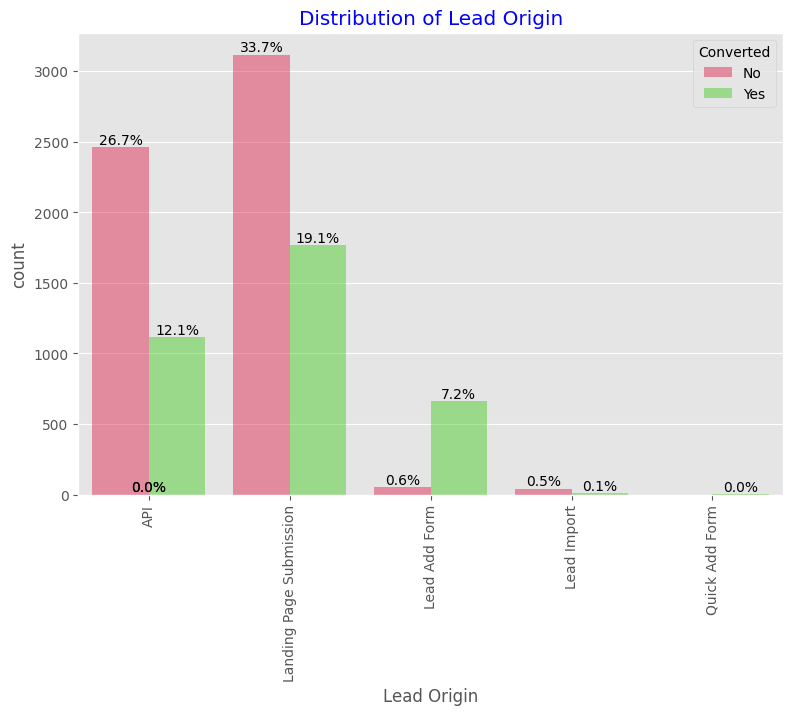

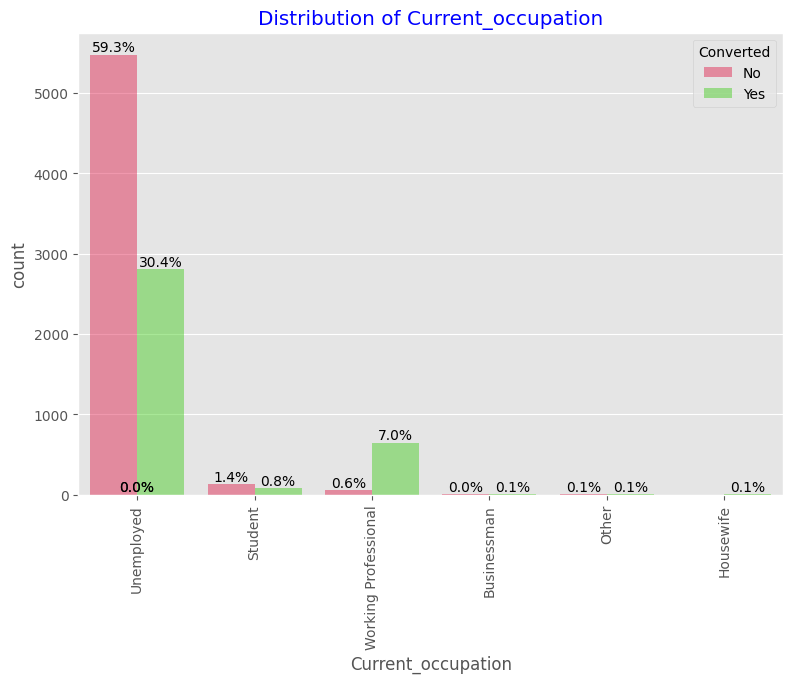

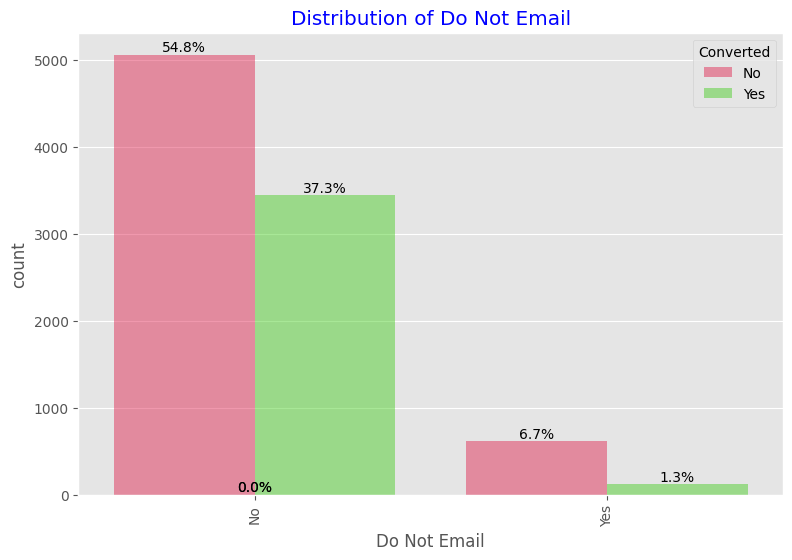

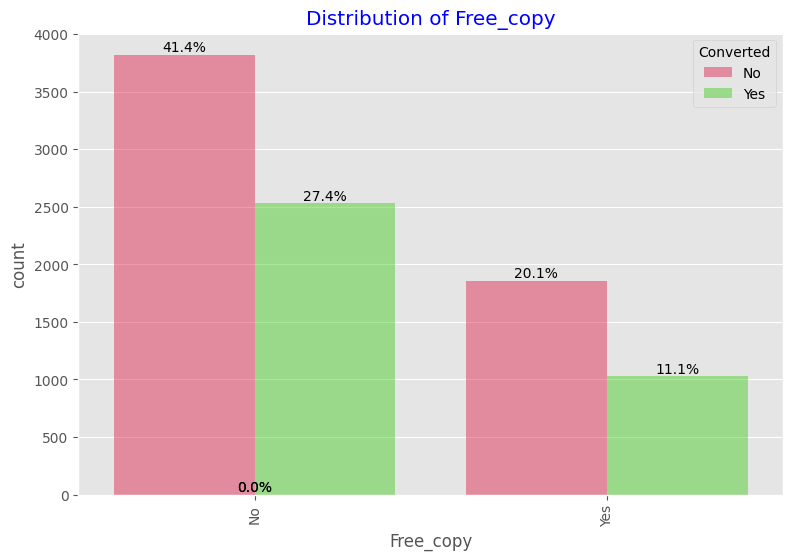

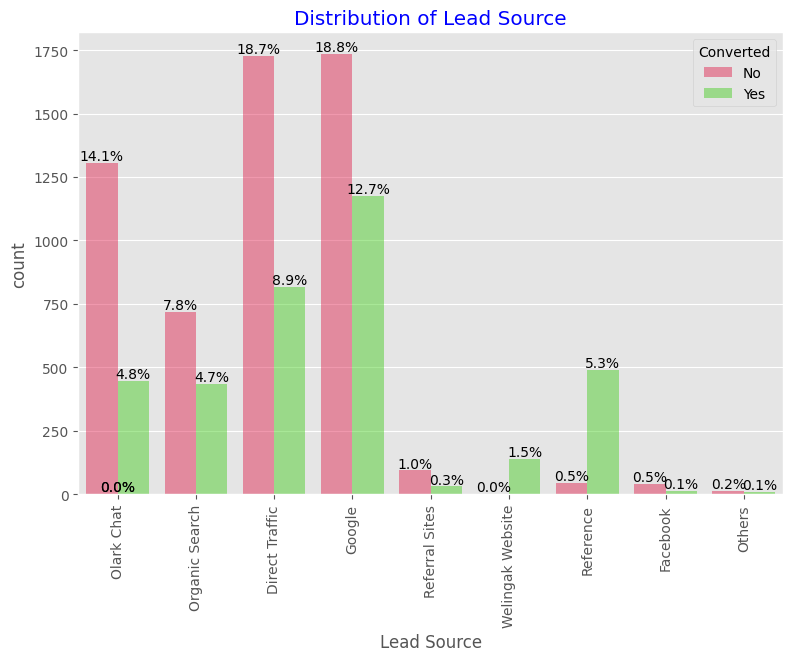

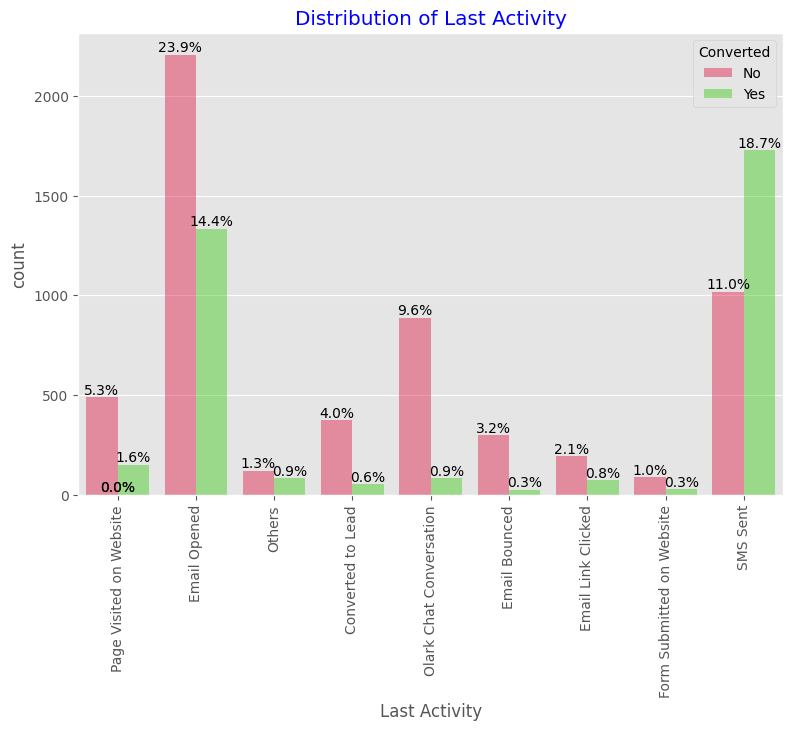

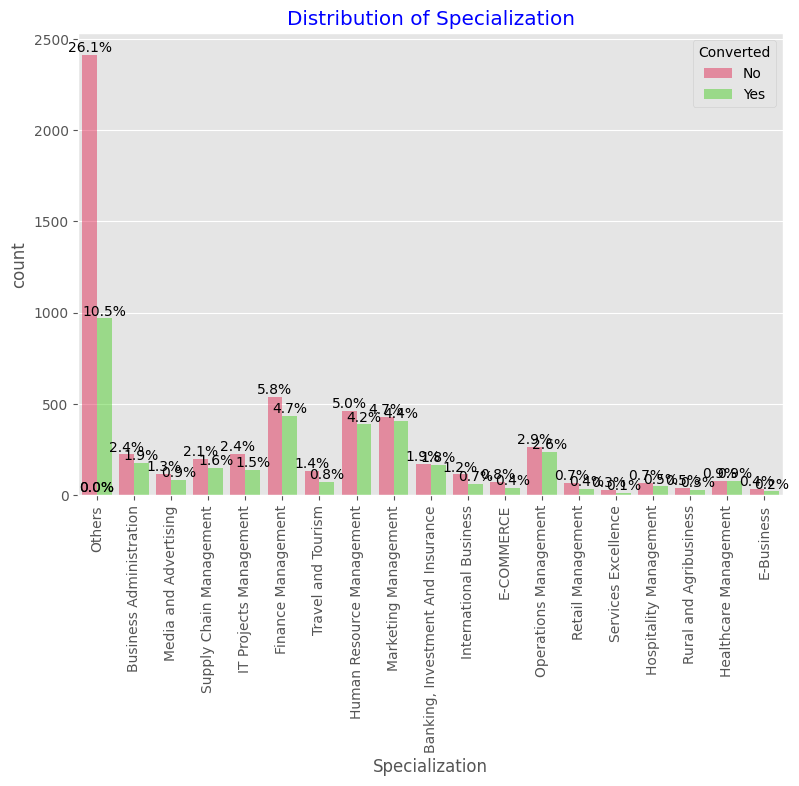

In [1524]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

Insights:

Lead Origin: Around 52% of all leads originated from "Landing Page Submission" out of which 19% are getting converted.

The "API" identified approximately 39% of customers with 12% getting converted.

What is your current occupation: Around 90% of the customers are Unemployed with lead conversion of 30%. While Working Professional contribute only 7.6% of total customers with most conversion rate.

Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

Lead Source: Google has LCR of 40% out of 31% customers , Direct Traffic contributes 32% LCR with 27% customers which is lower than Google,Organic Search also gives 37.8% of LCR but the contribution is by only 12.5% of customers ,Reference has LCR of 91% but there are only around 6% of customers through this Lead Source.

Last Activity: 'SMS Sent' has high lead conversion rate of 63% with 30% contribution from last activities, 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

Specialization: Marketing Managemt,HR Management,Finance Management shows good contribution.

# **Heat Map for the Numerical Variables**

---



In [1525]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

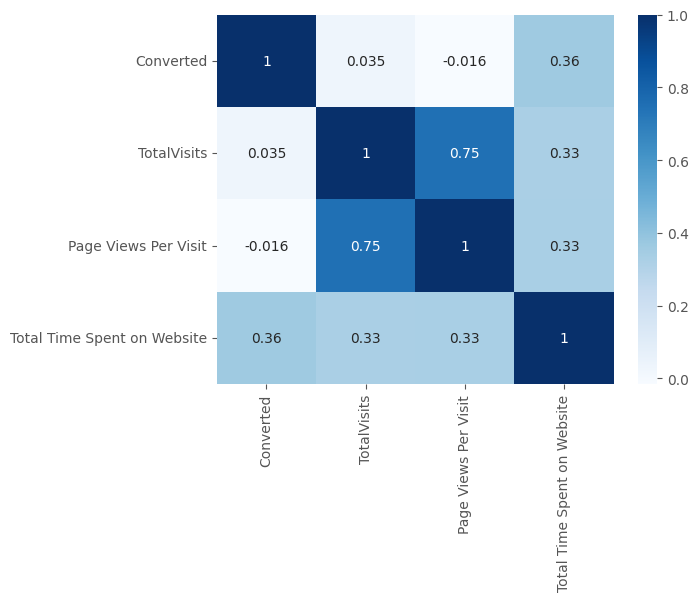

In [1526]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

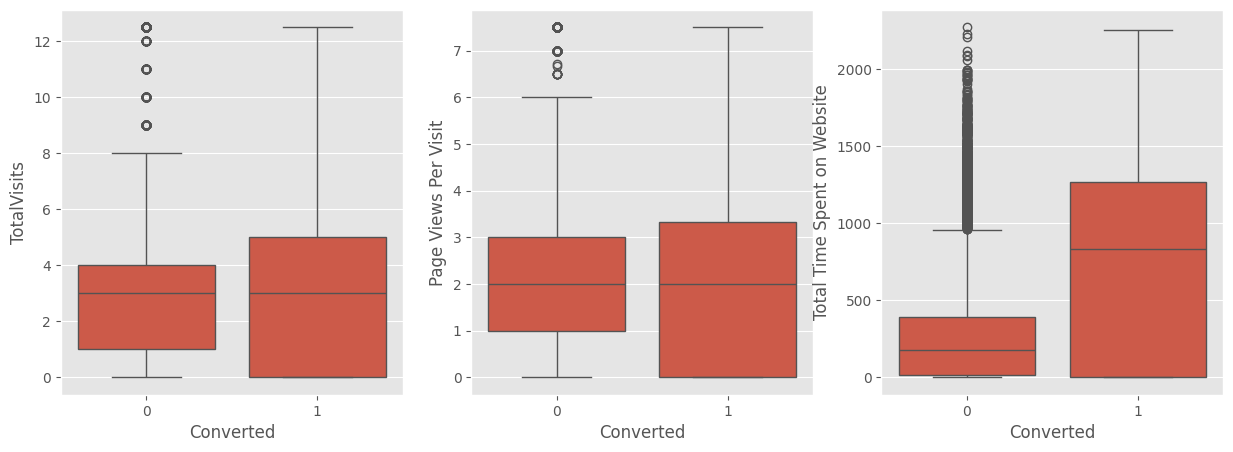

In [1527]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

### Insight: Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

**Mapping Binary categorical variables**

In [1528]:
# Mapping binary categorical variables (Yes/No to 1/0)
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)



# **Data Preparation**
Dummy Variables

For categorical variables with multiple levels, create dummy features (one-hot encoded)

Binary level categorical columns are already mapped to 1 / 0 in previous steps, So start with Dummy variable creation

In [1529]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  
0                   Others         Unemployed          0  
1                   Others         Unemployed          0  
2  Business Administration            Student          1  
3    Media and Advertising         Unemployed          0  
4                   Others         Unemployed          0

In [1530]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

dummy = dummy.astype(int)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [1531]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  \
0                      API      Olark Chat             0          0          0.0   
1                      API  Organic Search             0          0          5.0   
2  Landing Page Submission  Direct Traffic             0          1          2.0   
3  Landing Page Submission  Direct Traffic             0          0          1.0   
4  Landing Page Submission          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0                   Others   
4                         1428                   1.0        Converted to Lead   

            Specialization Current_occupation  Free_copy  Lead Origin_Landing Page Submission  \
0                   Others         Unemployed          0                                    0   
1                   Others         Unemployed          0                                    0   
2  Business Administration            Student          1                                    1   
3    Media and Advertising         Unemployed          0                                    1   
4                   Others         Unemployed          0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                          0                        0                           0   
1                          0                        0                           0   
2                          0                        0                           0   
3                          0                        0                           0   
4                          0                        0                           0   

   Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                     0                   0                       1                           0   
1                     0                   0                       0                           1   
2                     0                   0                       0                           0   
3                     0                   0                       0                           0   
4                     0                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                             0                            0                                 0   
1                             0                            0                                 0   
2                             0                            0                                 0   
3                             0                            0                                 0   
4                             0                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                     

In [1532]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],axis=1)

In [1533]:
df_leads.shape

(9240, 49)

## <strong><span style="color:brown">Step 6: Test-Train Split </span></strong>

In [1534]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]


In [1535]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1536]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [1537]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## <strong><span style="color:brown">Step 7: Feature Scaling </span></strong>

In [1538]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [1539]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Free_copy  \
1871     -0.291638    -1.064974                    -0.885371             -1.184892  -0.673169   
6795     -0.291638     0.262370                     0.005716             -0.488713   1.485511   
3516     -0.291638     0.594206                    -0.691418              0.123715  -0.673169   
8105     -0.291638     0.594206                     1.365219              1.432322  -0.673169   
3934     -0.291638    -1.064974                    -0.885371             -1.184892  -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                            -1.057954                  -0.293817                -0.071611   
6795                             0.945221                  -0.293817                -0.071611   
3516                            -1.057954                  -0.293817                -0.071611   
8105                             0.945221                  -0.293817                -0.071611   
3934                            -1.057954                  -0.293817                -0.071611   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                   -0.012435             -0.071611           -0.687272   
6795                   -0.012435             -0.071611           -0.687272   
3516                   -0.012435             -0.071611           -0.687272   
8105                   -0.012435             -0.071611            1.455029   
3934                   -0.012435             -0.071611           -0.687272   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                2.063622                   -0.371121           -0.052827   
6795               -0.484585                   -0.371121           -0.052827   
3516                2.063622                   -0.371121           -0.052827   
8105               -0.484585                   -0.371121           -0.052827   
3934                2.063622                   -0.371121           -0.052827   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871               -0.25331                   -0.120121                     -0.119457   
6795               -0.25331                   -0.120121                     -0.119457   
3516               -0.25331                   -0.120121                     -0.119457   
8105               -0.25331                   -0.120121                     -0.119457   
3934               -0.25331                   -0.120121                     -0.119457   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                    -0.194171                         -0.170637                    1.273920   
6795                    -0.194171                         -0.170637                    1.273920   
3516                    -0.194171                         -0.170637                    1.273920   
8105                    -0.194171                         -0.170637                   -0.784979   
3934                    -0.194171                         -0.170637                    1.273920   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
1871                                -0.113316                              -0.337384   
6795                                -0.113316                              -0.337384   
3516                                -0.113316                              -0.337384   
8105                                -0.113316                              -0.337384   
3934                                -0.113316                              -0.337384   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871              -0.14545                              -0.278641               -0.655280   
6795              -0.14545                   

In [1540]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

### Looking at Correlations
- Feature elimination based on correlations

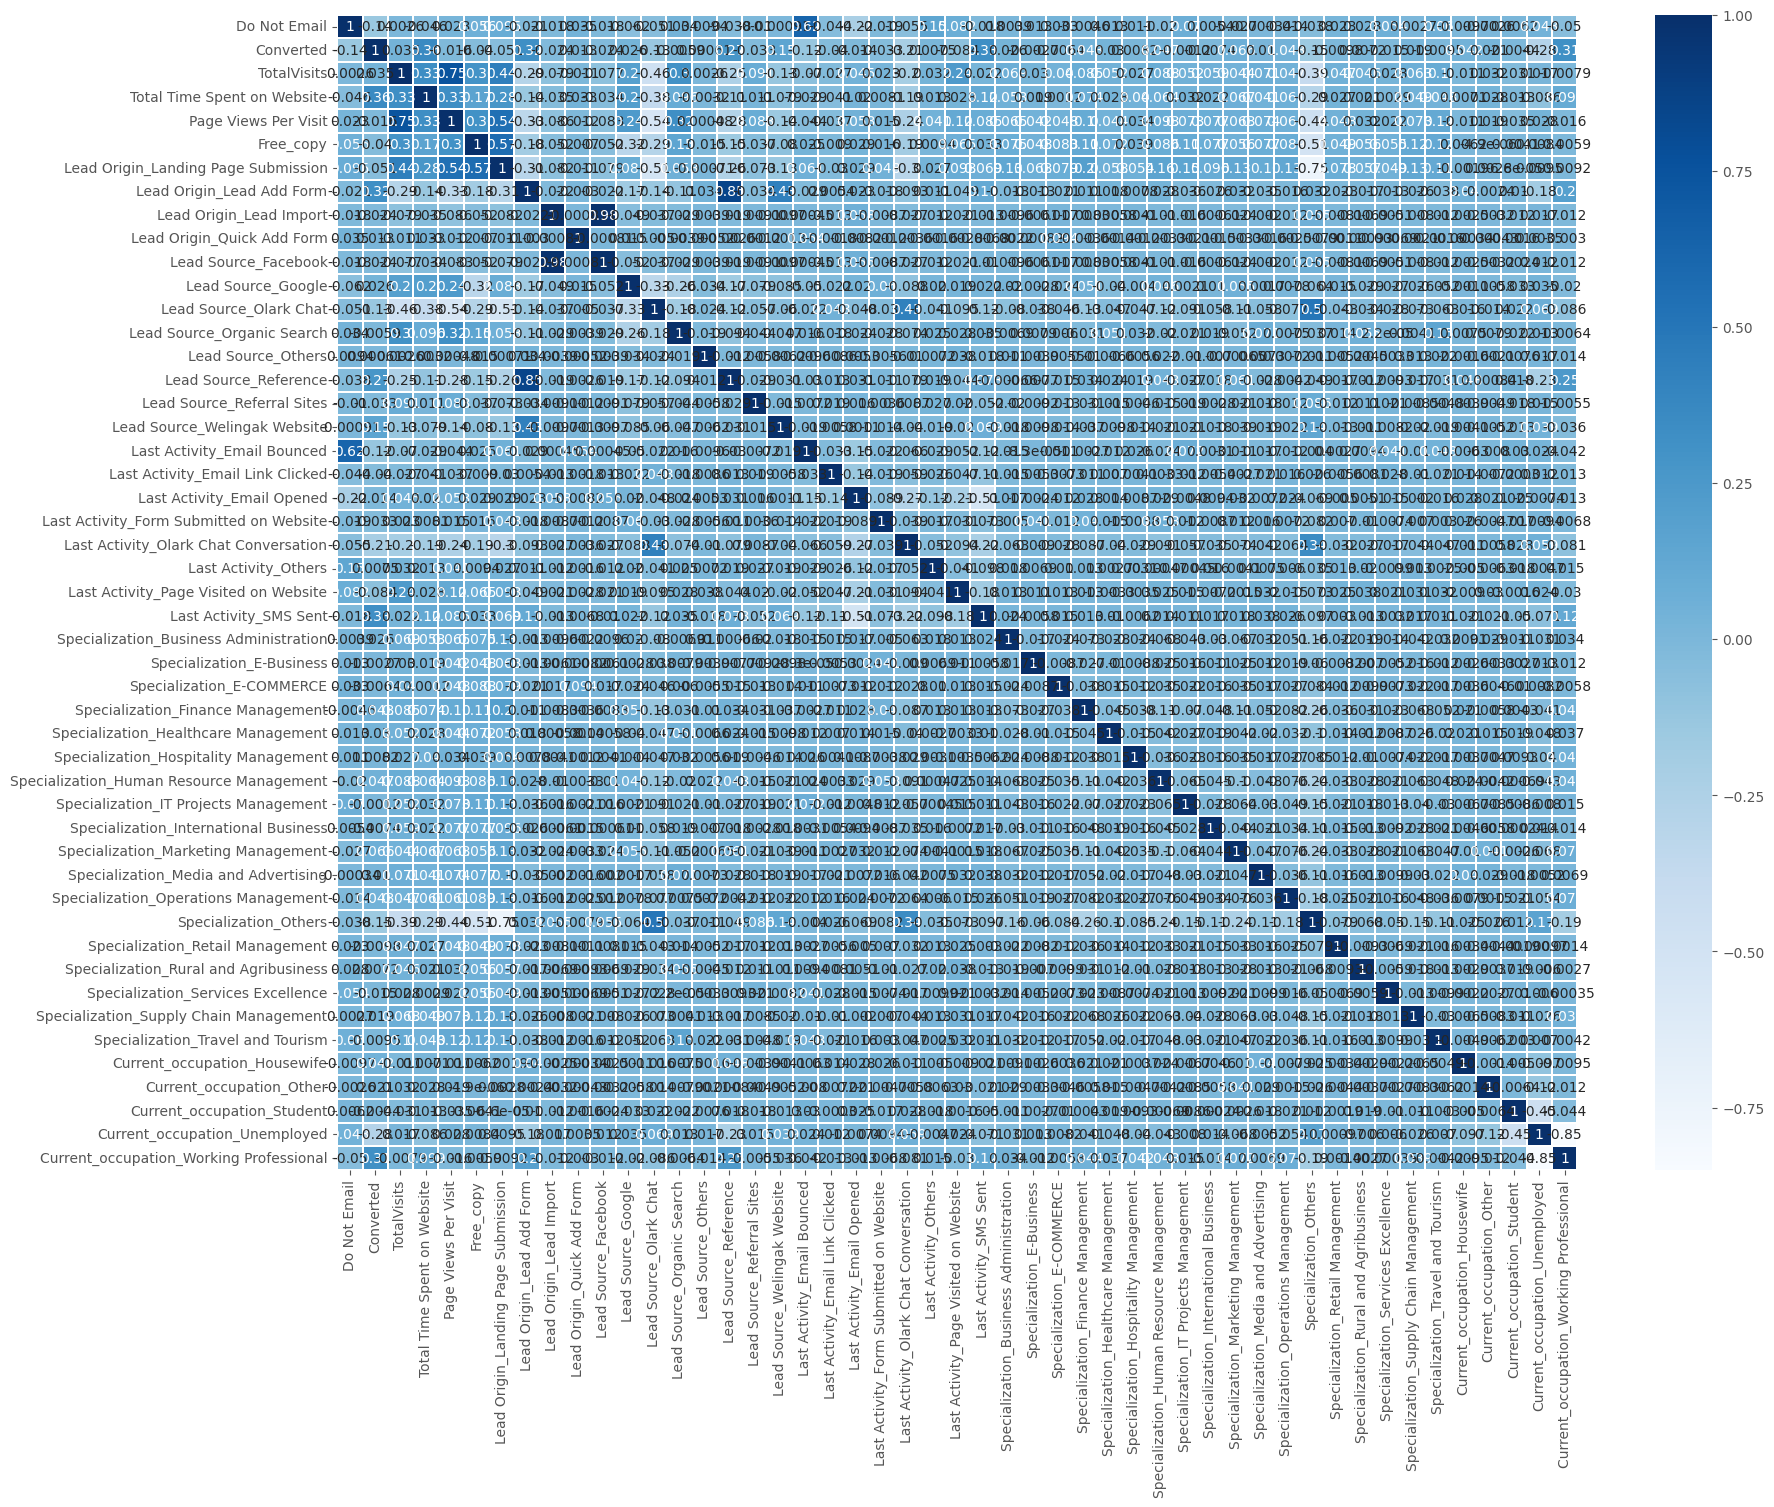

In [1541]:
# analyse correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

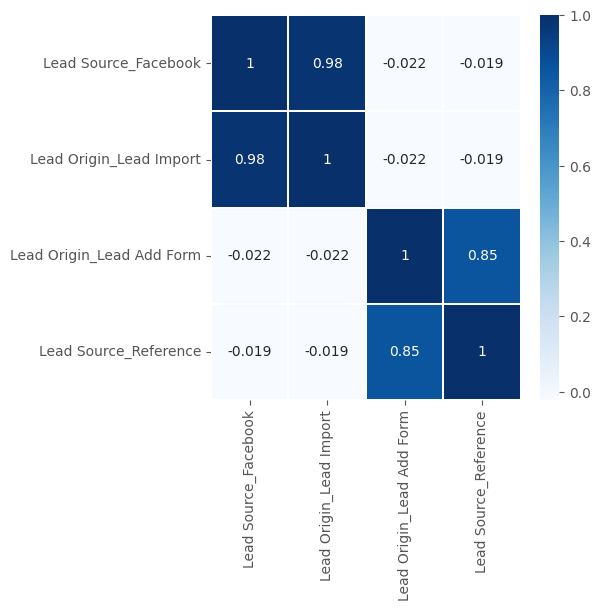

In [1542]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<strong><span style="color:Blue">Note:</span></strong> These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [1543]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

## <strong><span style="color:brown"> Model Building </span></strong>
- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

### 8.1 Feature Selection using RFE (Recursive Feature Elimination)

In [1544]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1545]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Free_copy', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 5),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 12),
 

In [1546]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
9                     Lead Source_Olark Chat            True        1
22                    Last Activity_SMS Sent            True        1
45   Current_occupation_Working Professional            True        1
2                Total Time Spent on Website            True        1
1                                TotalVisits            True        1
5        Lead Origin_Landing Page Submission            True        1
3                       Page Views Per Visit            True        1
4                                  Free_copy           False        2
28     Specialization_Hospitality Management           False        3
16          Last Activity_Email Link Clicked           False        4
21     Last Activity_Page Visited on Website           False        5
8                         Lead Source_Google           False        6
43                Current_occupation_Student           False        7
11                        Lead Source_Others           False        8
6                 Lead Origin_Quick Add Form           False        9
15               Last Activity_Email Bounced           False       10
31     Specialization_International Business           False       11
23    Specialization_Business Administration           False       12
29  Specialization_Human Resource Management           False       13
32       Specialization_Marketing Management           False       14
34      Specialization_Operations Management           False       15
36          Specialization_Retail Management           False       16
7                       Lead Source_Facebook           False       17
37     Specialization_Rural and Agribusiness           False       18
10                Lead Source_Organic Search           False       19
39    Specialization_Supply Chain Management           False       20
44             Current_occupation_Unemployed           False       21
30     Specialization_IT Projects Management           False       22
18   Last Activity_Form Submitted on Website           False       23
40         Specialization_Travel and Tourism           False       24
38        Specialization_Services Excellence           False       25
25                 Specialization_E-COMMERCE           False       26
33      Specialization_Media and Advertising           False       27
27      Specialization_Healthcare Management           False       28
42                  Current_occupation_Other           False       29
26         Specialization_Finance Management           False       30
24                 Specialization_E-Business           False       31
13                Lead Source_Referral Sites           False       32

In [1547]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [1548]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Free_copy', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management', 'Specialization_Hospitality Management',
       'Specialization_Human Resource Management', 'Specialization_IT Projects Management',
       'Specialization_International Business', 'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Operations Management',
       'Specialization_Retail Management', 'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Specialization_

In [1549]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [1550]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                     -0.566925
Do Not Email                              -0.288736
TotalVisits                                0.346396
Total Time Spent on Website                1.037839
Page Views Per Visit                      -0.316145
Lead Origin_Landing Page Submission       -0.586438
Lead Source_Olark Chat                     0.360008
Lead Source_Reference                      0.693639
Lead Source_Welingak Website               0.646317
Last Activity_Email Opened                 0.409286
Last Activity_Olark Chat Conversation     -0.199775
Last Activity_Others                       0.210368
Last Activity_SMS Sent                     0.945826
Specialization_Others                     -0.555176
Current_occupation_Housewife               0.858238
Current_occupation_Working Professional    0.714503
dtype: float64

In [1551]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.5
Date:                Tue, 28 Jan 2025   Deviance:                       5381.0
Time:                        17:54:20   Pearson chi2:                 8.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE : </span></strong> "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [1552]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [1553]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                     -0.593745
Do Not Email                              -0.290243
TotalVisits                                0.342574
Total Time Spent on Website                1.036875
Page Views Per Visit                      -0.316548
Lead Origin_Landing Page Submission       -0.583592
Lead Source_Olark Chat                     0.357926
Lead Source_Reference                      0.697123
Lead Source_Welingak Website               0.645746
Last Activity_Email Opened                 0.408059
Last Activity_Olark Chat Conversation     -0.201500
Last Activity_Others                       0.209041
Last Activity_SMS Sent                     0.940683
Specialization_Others                     -0.557632
Current_occupation_Working Professional    0.712065
dtype: float64

In [1554]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.2
Date:                Tue, 28 Jan 2025   Deviance:                       5396.5
Time:                        17:54:20   Pearson chi2:                 8.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong>  Model 2 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [1555]:
# Now checking VIFs for all variables in the Model 2
get_vif(X_train_rfe)

Features   VIF
0       Lead Origin_Landing Page Submission  3.48
1                     Specialization_Others  3.02
2                      Page Views Per Visit  2.88
3                               TotalVisits  2.32
4                    Lead Source_Olark Chat  2.29
5                Last Activity_Email Opened  2.09
6                    Last Activity_SMS Sent  1.97
7     Last Activity_Olark Chat Conversation  1.73
8                     Lead Source_Reference  1.69
9               Total Time Spent on Website  1.26
10                             Do Not Email  1.15
11  Current_occupation_Working Professional  1.15
12             Lead Source_Welingak Website  1.12
13                     Last Activity_Others  1.09

<strong><span style="color:Blue">NOTE:</span></strong> No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 2 for `Model Evaluation`.

## <strong><span style="color:brown">Step 9: Model Evaluation </span></strong>
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [1556]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.461313
6795    0.096696
3516    0.277597
8105    0.740609
3934    0.212207
4844    0.990145
3297    0.134810
8071    0.996973
987     0.172262
7423    0.885533
dtype: float64

In [1557]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46131302, 0.09669553, 0.27759722, 0.7406088 , 0.21220725,
       0.99014527, 0.13480986, 0.99697325, 0.17226238, 0.88553339])

In [1558]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.461313         1871
1          0        0.096696         6795
2          0        0.277597         3516
3          0        0.740609         8105
4          0        0.212207         3934

<strong><span style="color:Blue">NOTE:</span></strong> Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [1559]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.461313         1871          0
1          0        0.096696         6795          0
2          0        0.277597         3516          0
3          0        0.740609         8105          1
4          0        0.212207         3934          0

### 9.1 Confusion Matrix

In [1560]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3580  422]
 [ 823 1643]]


In [1561]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3580       |   422
# converted           823        |   1643


# Above is the confusion matrix when we use threshold of probability as 0.5

###  Accuracy

In [1562]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8075139146567718


### Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [1563]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1564]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6662611516626115


In [1565]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.894552723638181


In [1566]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1054472763618191


In [1567]:
# positive predictive value
print (TP / float(TP+FP))

0.7956416464891041


In [1568]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8130819895525778


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1569]:
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1570]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

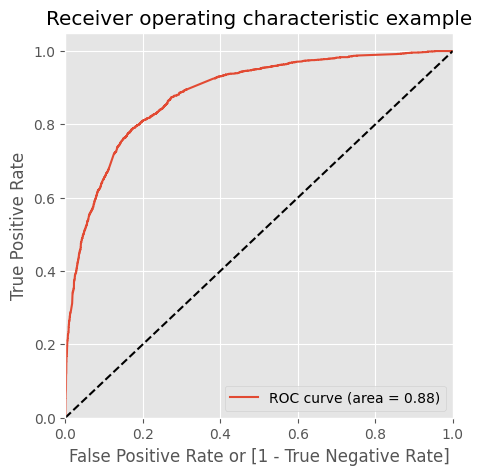

In [1571]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [1572]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0          0        0.461313         1871          0    1    1    1    1    1    0    0    0    0   
1          0        0.096696         6795          0    1    0    0    0    0    0    0    0    0   
2          0        0.277597         3516          0    1    1    1    0    0    0    0    0    0   
3          0        0.740609         8105          1    1    1    1    1    1    1    1    1    0   
4          0        0.212207         3934          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [1573]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.604360  0.974047  0.376562
0.2   0.2  0.729901  0.928629  0.607446
0.3   0.3  0.790353  0.830089  0.765867
0.4   0.4  0.814317  0.773317  0.839580
0.5   0.5  0.807514  0.666261  0.894553
0.6   0.6  0.797928  0.595702  0.922539
0.7   0.7  0.782622  0.511760  0.949525
0.8   0.8  0.757730  0.414436  0.969265
0.9   0.9  0.710266  0.255069  0.990755


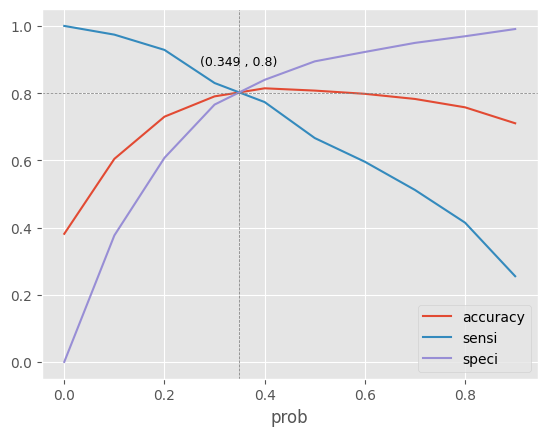

In [1574]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.349 is the approx. point where all the curves meet, so 0.349 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point

In [1575]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.349 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.461313         1871                1
1          0        0.096696         6795                0
2          0        0.277597         3516                0
3          0        0.740609         8105                1
4          0        0.212207         3934                0

###  Calculating all metrics using confusion matrix for Train

In [1576]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8055040197897341


In [1577]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))



In [1578]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3228  774]
 [ 484 1982]] 

************************************************** 

True Negative                    :  3228
True Positive                    :  1982
False Negative                   :  484
False Positve                    :  774
Model Accuracy                   :  0.8055
Model Sensitivity                :  0.8037
Model Specificity                :  0.8066
Model Precision                  :  0.7192
Model Recall                     :  0.8037
Model True Positive Rate (TPR)   :  0.8037
Model False Positive Rate (FPR)  :  0.1934


************************************************** 



### Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [1579]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

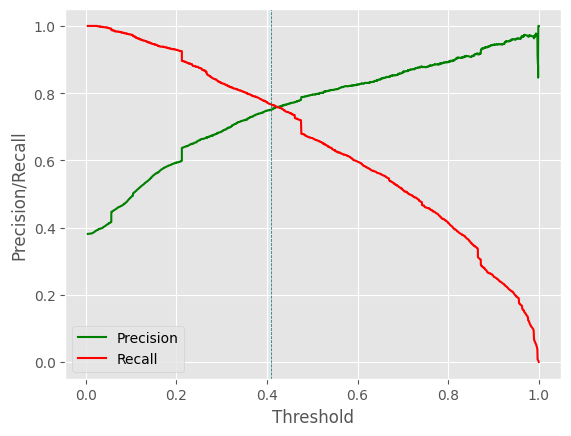

In [1580]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [1581]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [1582]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  precision_recall_prediction
0          0        0.461313         1871                1                            1
1          0        0.096696         6795                0                            0
2          0        0.277597         3516                0                            0
3          0        0.740609         8105                1                            1
4          0        0.212207         3934                0                            0

In [1583]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.349 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3376  626]
 [ 577 1889]] 

************************************************** 

True Negative                    :  3376
True Positive                    :  1889
False Negative                   :  577
False Positve                    :  626
Model Accuracy                   :  0.814
Model Sensitivity                :  0.766
Model Specificity                :  0.8436
Model Precision                  :  0.7511
Model Recall                     :  0.766
Model True Positive Rate (TPR)   :  0.766
Model False Positive Rate (FPR)  :  0.1564


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong>
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75-76~%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.349. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.


### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong>
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1584]:
# Lets add Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.461313         1871                1          46
1          0        0.096696         6795                0          10
2          0        0.277597         3516                0          28
3          0        0.740609         8105                1          74
4          0        0.212207         3934                0          21

## <strong><span style="color:brown"> Making Predictions on test set </span></strong>

### Scaling Test dataset

In [1585]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   int64  
 6   Lead Origin_Quick Add Form                2772 non-null   int64  
 7   Lead Source_Facebook                      2772 non-null   int64  
 8   Lead Source_Google                        2772 non-null   int64  
 9   Lead Source_Olark Chat                    2772 non-null   int64  
 10  Lead Source_Organic Search            

In [1586]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Free_copy  \
4269             0          8.0                         1011                   7.5          0   
2376             0          0.0                            0                   0.0          0   
7766             0          5.0                           59                   5.0          0   
9199             0          0.0                            0                   0.0          0   
4359             0          0.0                            0                   0.0          0   

      Lead Origin_Landing Page Submission  Lead Origin_Quick Add Form  Lead Source_Facebook  \
4269                                    0                           0                     0   
2376                                    0                           0                     0   
7766                                    0                           0                     0   
9199                                    0                           0                     0   
4359                                    0                           0                     0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                   0                       0                           0                   0   
2376                   0                       0                           0                   0   
7766                   1                       0                           0                   0   
9199                   0                       1                           0                   0   
4359                   0                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  \
4269                      0                           0                             0   
2376                      1                           0                             0   
7766                      0                           0                             0   
9199                      0                           0                             0   
4359                      1                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                            0                                 0                           0   
2376                            0                                 0                           0   
7766                            0                                 0                           0   
9199                            0                                 0                           0   
4359                            0                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  \
4269                                        0                                      0   
2376                                        0                                      0   
7766                                        0                                      0   
9199                                        0                                      1   
4359                                        0                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
4269                     0                                      0                       1   
2376                     0                                      0                       1   
7766                     1                                      0                       0   
9199                     0                                      0                       0   
4359                     0                                      0                       0   

      Specialization_Business Adm

In [1587]:
num_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Free_copy', 'Lead Origin_Landing Page Submission', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management', 'Specialization_Hospitality Management',
       'Specialization_Human Resource Management', 'Sp

### 10.2 Prediction on Test Dataset using final model

In [1588]:
X_test = X_test[rfe_col]
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269             0          8.0                         1011                   7.5   
2376             0          0.0                            0                   0.0   
7766             0          5.0                           59                   5.0   
9199             0          0.0                            0                   0.0   
4359             0          0.0                            0                   0.0   

      Lead Origin_Landing Page Submission  Lead Source_Olark Chat  Lead Source_Reference  \
4269                                    0                       0                      0   
2376                                    0                       0                      1   
7766                                    0                       0                      0   
9199                                    0                       1                      0   
4359                                    0                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_SMS Sent  \
4269                                      0                     0                       1   
2376                                      0                     0                       1   
7766                                      0                     1                       0   
9199                                      1                     0                       0   
4359                                      0                     0                       0   

      Specialization_Others  Current_occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

In [1589]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [1590]:
# making prediction using model 2 (final model)
y_test_pred = logm2.predict(X_test_sm)

In [1591]:
# top 10 columns
y_test_pred[:10]

4269    1.000000
2376    0.619265
7766    1.000000
9199    0.269935
4359    0.625143
9186    1.000000
1631    1.000000
8963    1.000000
8007    1.000000
5324    1.000000
dtype: float64

In [1592]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  1.000000
2376  0.619265
7766  1.000000
9199  0.269935
4359  0.625143

In [1593]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [1594]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  1.000000
1          1         2376  0.619265
2          1         7766  1.000000
3          0         9199  0.269935
4          1         4359  0.625143

In [1595]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        1.000000
1         2376          1        0.619265
2         7766          1        1.000000
3         9199          0        0.269935
4         4359          1        0.625143

In [1596]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        1.000000                1
1         2376          1        0.619265                1
2         7766          1        1.000000                1
3         9199          0        0.269935                0
4         4359          1        0.625143                1

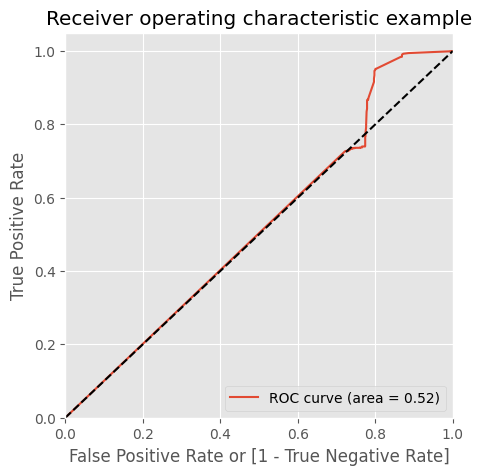

In [1597]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [1598]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3376  626]
 [ 577 1889]] 

************************************************** 

True Negative                    :  3376
True Positive                    :  1889
False Negative                   :  577
False Positve                    :  626
Model Accuracy                   :  0.814
Model Sensitivity                :  0.766
Model Specificity                :  0.8436
Model Precision                  :  0.7511
Model Recall                     :  0.766
Model True Positive Rate (TPR)   :  0.766
Model False Positive Rate (FPR)  :  0.1564


************************************************** 



In [1600]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                1.036875
Last Activity_SMS Sent                     0.940683
Current_occupation_Working Professional    0.712065
Lead Source_Reference                      0.697123
Lead Source_Welingak Website               0.645746
Last Activity_Email Opened                 0.408059
Lead Source_Olark Chat                     0.357926
TotalVisits                                0.342574
Last Activity_Others                       0.209041
Last Activity_Olark Chat Conversation     -0.201500
Do Not Email                              -0.290243
Page Views Per Visit                      -0.316548
Specialization_Others                     -0.557632
Lead Origin_Landing Page Submission       -0.583592
const                                     -0.593745
dtype: float64

<strong><span style="color:Blue">NOTE:</span></strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong>
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1601]:
# Lets add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        1.000000                1         100
1         2376          1        0.619265                1          62
2         7766          1        1.000000                1         100
3         9199          0        0.269935                0          27
4         4359          1        0.625143                1          63

<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.